In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

In [2]:
print(sklearn.datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#Load boston housing dataset
boston_housing = datasets.load_boston()
X = pd.DataFrame(boston_housing['data'], columns = boston_housing['feature_names'])

#"target" is the response variable 
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['target'] 

In [4]:
data = X
data['target'] = y

In [5]:
data.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

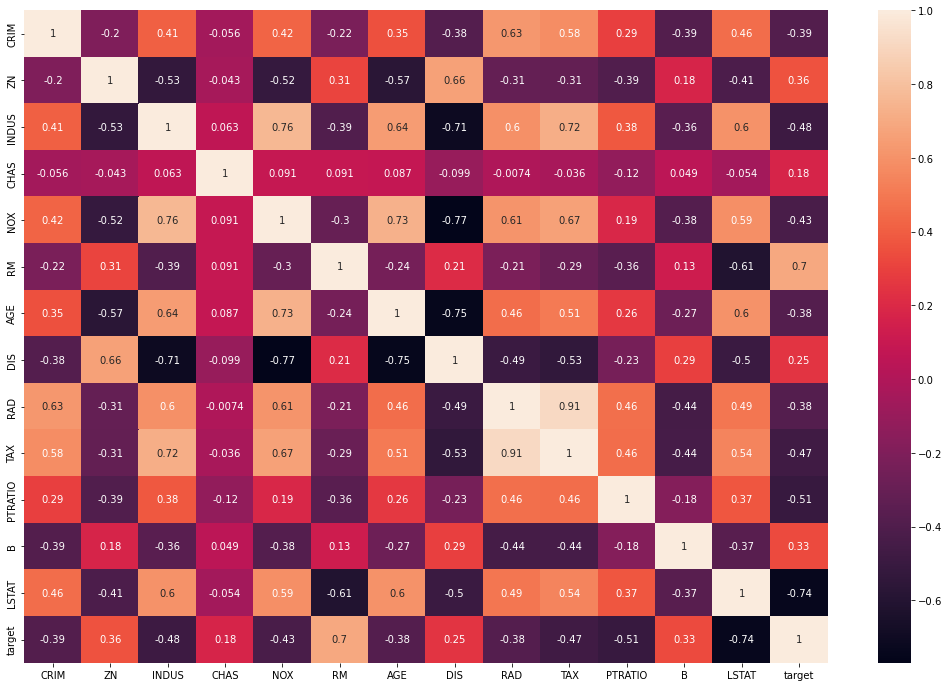

In [6]:
## Ploting correlation map to remove correlated variables to avoid redundency
plt.figure(figsize=(18,12))
sns.heatmap(X.corr(),annot= True)

In [7]:
## From the above graph we can see RAD is highly correlated with TAX. So we will remove RAD to avoid redundency
X=X.drop('RAD',axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=101)
print('Shape of training datset:',X_train.shape,y_train.shape)
"\n"
print('Shape of validation datset:',X_val.shape,y_val.shape)

Shape of training datset: (379, 13) (379,)
Shape of validation datset: (127, 13) (127,)


In [9]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [10]:
X_np=X_train.to_numpy()
Values=np.linalg.inv(X_np.T.dot(X_np)).dot(X_np.T).dot(y_train)
df1=pd.DataFrame({'Predictors':X_train.columns,'Feature_weights':Values})
print(df1)

   Predictors  Feature_weights
0        CRIM    -1.331713e-13
1          ZN    -6.418477e-15
2       INDUS    -6.011858e-14
3        CHAS    -9.262702e-12
4         NOX     4.520828e-12
5          RM     7.993606e-14
6         AGE    -5.013351e-15
7         DIS    -9.026113e-14
8         TAX     2.341877e-17
9     PTRATIO    -1.110223e-14
10          B     5.483895e-16
11      LSTAT    -1.171285e-14
12     target     1.000000e+00


In [11]:
from sklearn.linear_model import LinearRegression
Training_X=X_train[['AGE','RM']]
Validation_X=X_val[['AGE','RM']]
Model_1=LinearRegression()
Model_1.fit(Training_X,y_train)
print(pd.DataFrame({'Predictors':Training_X.columns,'Feature_weights_values':Model_1.coef_}))
"\n"
print('Intercepts=',Model_1.intercept_)

  Predictors  Feature_weights_values
0        AGE               -0.069177
1         RM                8.292626
Intercepts= -24.972671031531032


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
Predictions=Model_1.predict(Validation_X)
result=pd.DataFrame({'Predictions':Predictions,'Actual_values':y_val,'Residuals':Predictions-y_val})
print(result)
'\n'
rmse=np.sqrt(mean_squared_error(y_val,Predictions))
r2=r2_score(y_val,Predictions)
MAE=metrics.mean_absolute_error(y_val,Predictions)
print('RMSE:',rmse,"\n"'R-Square:',r2,"\n"'MAE:',MAE)

     Predictions  Actual_values  Residuals
0      38.118098           50.0 -11.881902
1      30.545341           36.2  -5.654659
2      19.936150           11.7   8.236150
3      21.489062           14.9   6.589062
4      28.209141           30.8  -2.590859
..           ...            ...        ...
122    22.433521           20.9   1.533521
123    28.792976           32.4  -3.607024
124    25.489546           24.7   0.789546
125    22.314157           23.0  -0.685843
126    21.013976           10.9  10.113976

[127 rows x 3 columns]
RMSE: 6.867459373769744 
R-Square: 0.5492377100741594 
MAE: 4.451308568394355


In [13]:
Model_2=LinearRegression()
Model_2.fit(X_train,y_train)
Predictions_1=Model_2.predict(X_val)
result1=pd.DataFrame({'Predictions':Predictions_1,'Actual_values':y_val,'Residuals':Predictions_1-y_val})
print(result1)


     Predictions  Actual_values     Residuals
0           50.0           50.0 -2.842171e-14
1           36.2           36.2  1.421085e-14
2           11.7           11.7  7.283063e-14
3           14.9           14.9  1.776357e-15
4           30.8           30.8 -1.421085e-14
..           ...            ...           ...
122         20.9           20.9 -2.131628e-14
123         32.4           32.4 -2.131628e-14
124         24.7           24.7 -2.131628e-14
125         23.0           23.0 -5.329071e-14
126         10.9           10.9  1.154632e-13

[127 rows x 3 columns]


In [14]:
rmse=np.sqrt(mean_squared_error(y_val,Predictions_1))
r2=r2_score(y_val,Predictions_1)
MAE=metrics.mean_absolute_error(y_val,Predictions_1)
print('RMSE:',rmse,"\n"'R-Square:',r2,"\n"'MAE:',MAE)

RMSE: 3.4189441929464125e-14 
R-Square: 1.0 
MAE: 2.285485886283472e-14


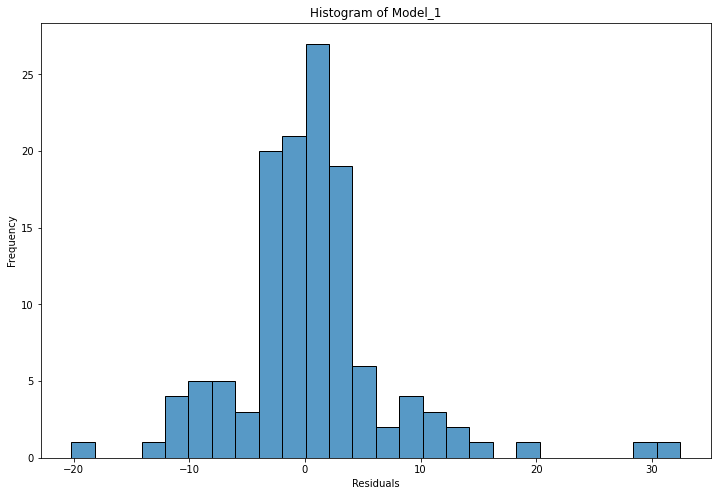

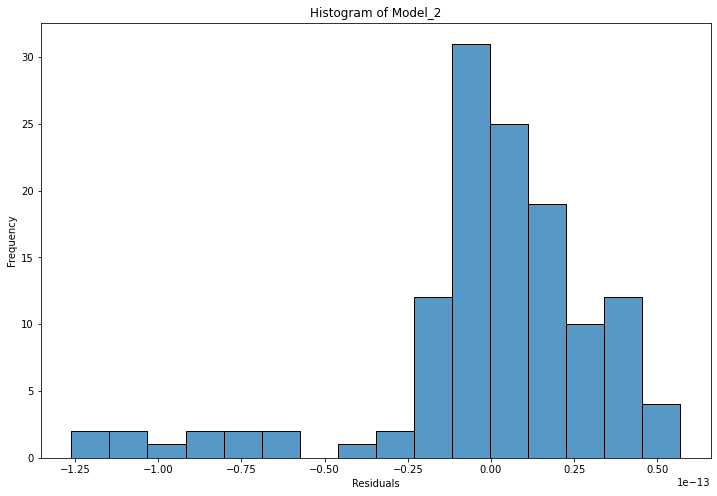

In [15]:
from IPython.core.pylabtools import figsize
# Finding the difference between actual and predicted variable to plot histogram for Model-1 and Model-2
# Residuals on X-axis and Frequency on y-axis
A=y_val-Predictions
plt.figure(figsize=(12,8))
sns.histplot(A)
plt.title('Histogram of Model_1')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
"\n"
"\n"
B=y_val-Predictions_1
plt.figure(figsize=(12,8))
sns.histplot(B)
plt.title('Histogram of Model_2')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [16]:
from sklearn.linear_model import Lasso
Model_3=Lasso()
Model_3.fit(X_train,y_train)
Predictions_2=Model_3.predict(X_val)
print(pd.DataFrame({'Predictors':X_train.columns,'Feature_weights_values':Model_3.coef_}))
"\n"
print('Intercepts=',Model_3.intercept_)


   Predictors  Feature_weights_values
0        CRIM               -0.000000
1          ZN                0.000000
2       INDUS               -0.000000
3        CHAS                0.000000
4         NOX               -0.000000
5          RM                0.000000
6         AGE               -0.000000
7         DIS                0.000000
8         TAX               -0.000312
9     PTRATIO               -0.000000
10          B                0.000153
11      LSTAT               -0.000000
12     target                0.983745
Intercepts= 0.43297991941274816


In [17]:
rmse=np.sqrt(mean_squared_error(y_val,Predictions_2))
r2=r2_score(y_val,Predictions_2)
MAE=metrics.mean_absolute_error(y_val,Predictions_2)
print('RMSE:',rmse,"\n"'R-Square:',r2,"\n"'MAE:',MAE)

RMSE: 0.14620388533734008 
R-Square: 0.9997956977230982 
MAE: 0.10580533745298405


 # Model_3 is best for future implementation as RMSE value is very low and R-Square value is hight amont all models